<a href="https://colab.research.google.com/github/hirukad/Titanic-disaster-analysis/blob/main/titanic_disaster_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A machine learning model that can predict whether a passenger on the titanic is **survived(1)** or **not survived(0)** based on their features

Loading libraries and datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('train.csv')
final_test_df = pd.read_csv('test.csv')

Overview

In [3]:
print(f'Train df shape: {train_df.shape}')
print(f'Test df shape: {final_test_df.shape}')

Train df shape: (891, 12)
Test df shape: (418, 11)


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA

<Axes: >

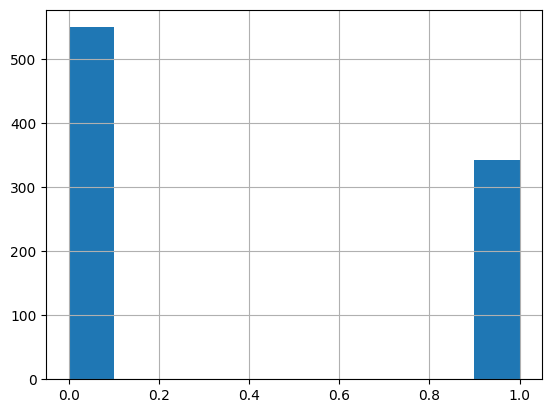

In [6]:
#target varivable analysis
train_df['Survived'].hist()

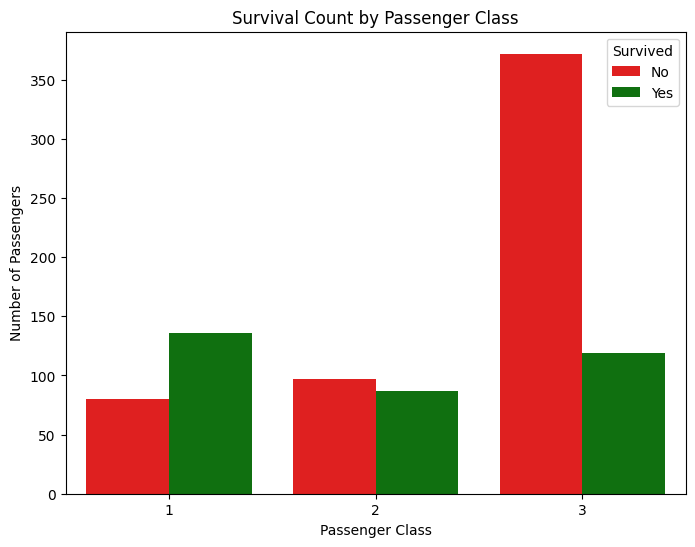

In [7]:
#survival by Pclass
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='Pclass', hue='Survived', palette=['red','green'])

plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

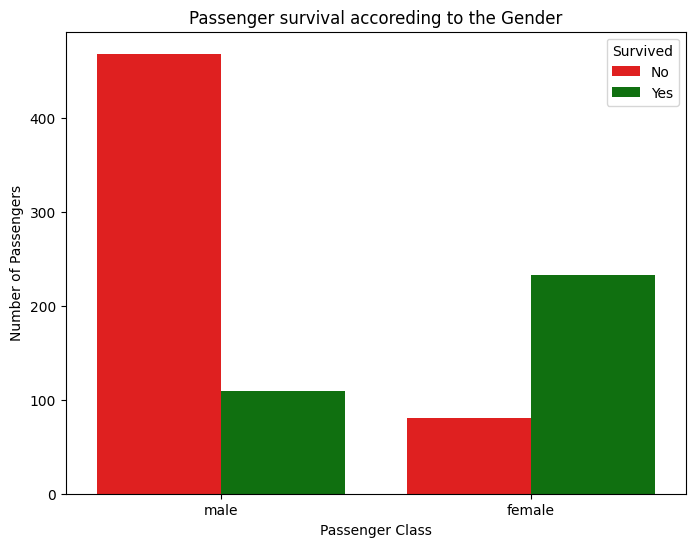

In [8]:
# Survival by gender
plt.figure(figsize=(8,6))
sns.countplot(data=train_df,x='Sex',hue='Survived',palette=['red','green'])
plt.title('Passenger survival accoreding to the Gender')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

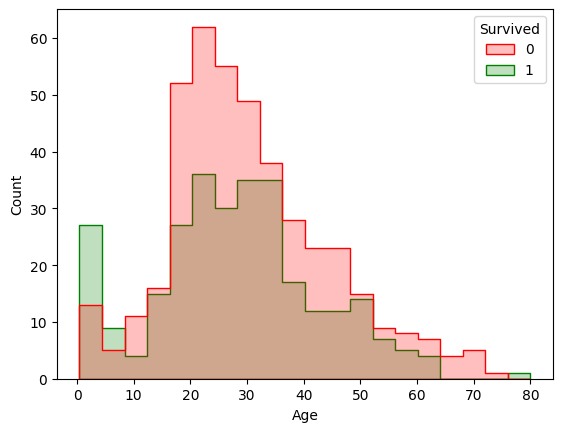

In [9]:
# Survival according to the age
sns.histplot(data=train_df, x='Age', hue='Survived',
             element='step', palette=['red','green'])

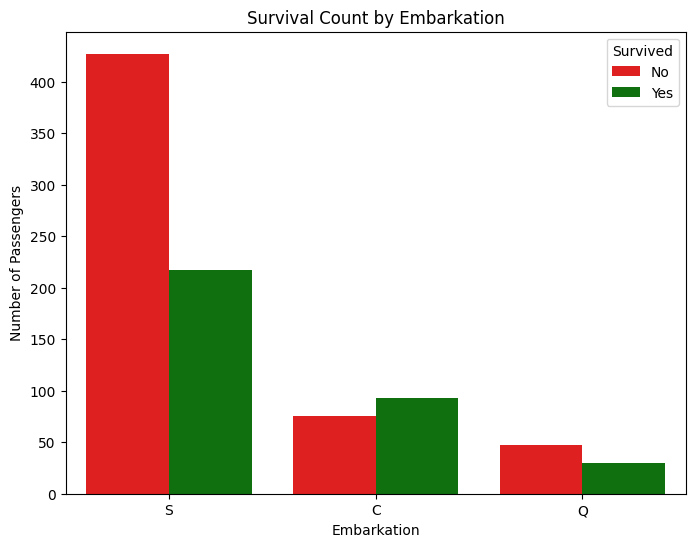

In [10]:
#survival by Embarkation
plt.figure(figsize=(8,6))
sns.countplot(data=train_df, x='Embarked', hue='Survived', palette=['red','green'])

plt.title('Survival Count by Embarkation')
plt.xlabel('Embarkation')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

<Axes: xlabel='HasCabin', ylabel='count'>

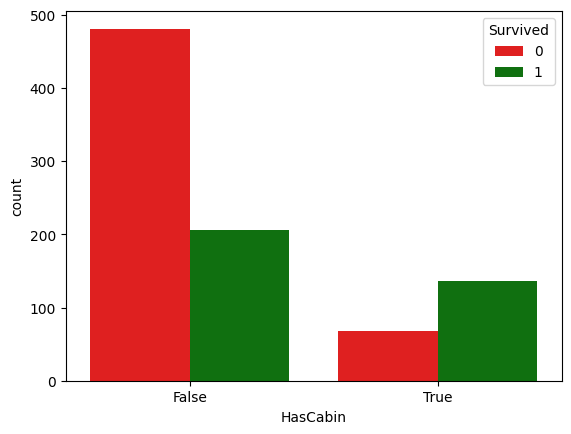

In [11]:
#Survival according to passeger belongs to a cabin or not
train_df['HasCabin'] = train_df['Cabin'].notnull()
final_test_df['HasCabin'] = final_test_df['Cabin'].notnull()
sns.countplot(data=train_df, x='HasCabin', hue='Survived', palette=['red','green'])

In [12]:
# Replace Unknown for NaN in cabin
train_df['Cabin'] = train_df['Cabin'].fillna('Unknown')
final_test_df['Cabin'] = final_test_df['Cabin'].fillna('Unknown')

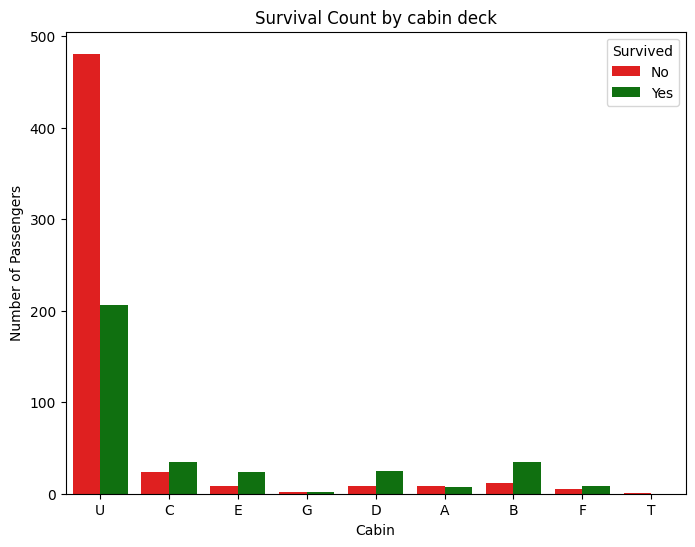

In [13]:
#survival by cabin
plt.figure(figsize=(8,6))

# Added new feature called deck
train_df['Deck'] = train_df['Cabin'].str[0]
final_test_df['Deck'] = final_test_df['Cabin'].str[0]

sns.countplot(data=train_df, x='Deck', hue='Survived', palette=['red','green'])
plt.title('Survival Count by cabin deck')
plt.xlabel('Cabin')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S,False,U
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,True,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S,False,U
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,True,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S,False,U


Data Cleaning

In [15]:
# Feature Engineering
train_df['FamilySize'] = train_df['SibSp']+train_df['Parch']+1

train_df['Is_alone'] = ((train_df['SibSp'] + train_df['Parch']) == 0).astype(int)

# Extract title using string split
train_df['Title'] = train_df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# group rare titles into "Rare"
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
train_df['Title'] = train_df['Title'].replace(rare_titles, 'Rare')

# age bins and labels
bins = [0,12,18,35,60,120]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
train_df['AgeGroup'] = train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

In [16]:
# Feature Engineering
final_test_df['FamilySize'] = final_test_df['SibSp']+final_test_df['Parch']+1

final_test_df['Is_alone'] = ((final_test_df['SibSp'] + final_test_df['Parch']) == 0).astype(int)

# Extract title using string split
final_test_df['Title'] = final_test_df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
# group rare titles into "Rare"
rare_titles = ['Lady','Countess','Capt','Col','Don','Dr','Major','Rev','Sir','Jonkheer','Dona']
final_test_df['Title'] = final_test_df['Title'].replace(rare_titles, 'Rare')

# age bins and labels
bins = [0,12,18,35,60,120]
labels = ['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
final_test_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels)

In [17]:
#dorop colomns
columns_drop = ['PassengerId','Name','Ticket']
test_ids = final_test_df['PassengerId']
train_df = train_df.drop(columns=columns_drop)
final_test_df = final_test_df.drop(columns=columns_drop)

In [18]:
train_df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,HasCabin,Deck,FamilySize,Is_alone,Title,AgeGroup
0,0,3,male,22.0,1,0,7.2500,Unknown,S,False,U,2,0,Mr,YoungAdult
1,1,1,female,38.0,1,0,71.2833,C85,C,True,C,2,0,Mrs,Adult
2,1,3,female,26.0,0,0,7.9250,Unknown,S,False,U,1,1,Miss,YoungAdult
3,1,1,female,35.0,1,0,53.1000,C123,S,True,C,2,0,Mrs,YoungAdult
4,0,3,male,35.0,0,0,8.0500,Unknown,S,False,U,1,1,Mr,YoungAdult


In [19]:
# fill mean age
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
# fill median embarked
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode())

In [20]:
# fill mean age
final_test_df['Age'] = final_test_df['Age'].fillna(final_test_df['Age'].mean())
#fill the mean fare
final_test_df['Fare'] = final_test_df['Age'].fillna(final_test_df['Age'].mean())
# fill median embarked
final_test_df['Embarked'] = final_test_df['Embarked'].fillna(final_test_df['Embarked'].mode())

In [21]:
# Standardizing
from sklearn.preprocessing import StandardScaler
numeric_cols = ['Age','SibSp','Parch','FamilySize','Fare']
scaler = StandardScaler()
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])
final_test_df[numeric_cols] = scaler.transform(final_test_df[numeric_cols])

/tmp/ipython-input-3611610030.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_features['Survived'] = train_df['Survived']


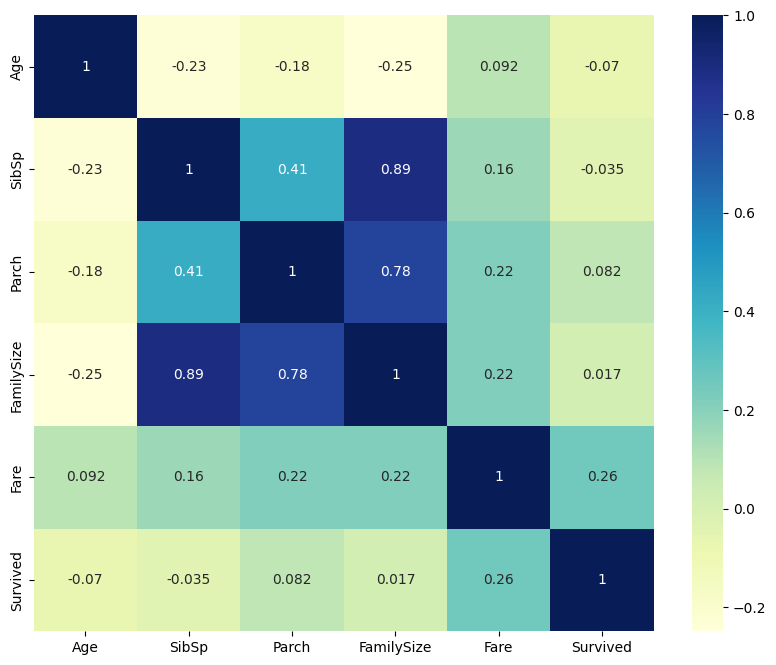

In [22]:
# correlation
plt.figure(figsize=(10,8))
numeric_features = train_df[numeric_cols]
numeric_features['Survived'] = train_df['Survived']
sns.heatmap(numeric_features.corr(), annot=True, cmap="YlGnBu")
plt.show()

In [23]:
print(f'Train df shape: {train_df.shape}')
print(f'Test df shape: {final_test_df.shape}')

Train df shape: (891, 15)
Test df shape: (418, 14)


In [24]:
# encodeing
categorical_variables = ['Sex', 'Cabin','Title','Pclass','Embarked','Deck','AgeGroup']

combined = pd.concat([train_df, final_test_df], sort=False)
combined = pd.get_dummies(combined, columns=categorical_variables, drop_first=True)

# Split them back
train_df = combined.iloc[:len(train_df), :]
final_test_df = combined.iloc[len(train_df):, :]

In [25]:
# Convert all boolean columns to integers
bool_cols = train_df.select_dtypes(include='bool').columns
train_df[bool_cols] = train_df[bool_cols].astype(int)
final_test_df[bool_cols] = final_test_df[bool_cols].astype(int)

/tmp/ipython-input-2709938565.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[bool_cols] = train_df[bool_cols].astype(int)
/tmp/ipython-input-2709938565.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_test_df[bool_cols] = final_test_df[bool_cols].astype(int)


In [26]:
train_df.head(5)

,Survived,Age,SibSp,Parch,Fare,HasCabin,FamilySize,Is_alone,Sex_male,Cabin_A11,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
0,0.0,-0.592481,0.432793,-0.473674,-0.502445,0,0.059160,0,1,0,...,0,0,0,0,0,1,0,1,0,0
1,1.0,0.638789,0.432793,-0.473674,0.786845,1,0.059160,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,-0.284663,-0.474545,-0.473674,-0.488854,0,-0.560975,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,1.0,0.407926,0.432793,-0.473674,0.420730,1,0.059160,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.0,0.407926,-0.474545,-0.473674,-0.486337,0,-0.560975,1,1,0,...,0,0,0,0,0,1,0,1,0,0


In [27]:
final_test_df= final_test_df.drop(columns=['Survived'])

In [28]:
print(f'Train df shape: {train_df.shape}')
print(f'Test df shape: {final_test_df.shape}')

Train df shape: (891, 219)
Test df shape: (418, 218)


In [29]:
y = train_df['Survived']
X = train_df.drop(columns=['Survived'])

In [30]:
print(train_df.columns)
print(final_test_df.columns)

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'FamilySize',
       'Is_alone', 'Sex_male', 'Cabin_A11',
       ...
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U',
       'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult',
       'AgeGroup_Senior'],
      dtype='object', length=219)
Index(['Age', 'SibSp', 'Parch', 'Fare', 'HasCabin', 'FamilySize', 'Is_alone',
       'Sex_male', 'Cabin_A11', 'Cabin_A14',
       ...
       'Deck_D', 'Deck_E', 'Deck_F', 'Deck_G', 'Deck_T', 'Deck_U',
       'AgeGroup_Teen', 'AgeGroup_YoungAdult', 'AgeGroup_Adult',
       'AgeGroup_Senior'],
      dtype='object', length=218)


In [31]:
final_test_df.describe()

,Age,SibSp,Parch,Fare,HasCabin,FamilySize,Is_alone,Sex_male,Cabin_A11,Cabin_A14,...,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Deck_U,AgeGroup_Teen,AgeGroup_YoungAdult,AgeGroup_Adult,AgeGroup_Senior
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.0,...,418.000000,418.000000,418.000000,418.000000,418.0,418.000000,418.000000,418.000000,418.000000,418.000000
mean,0.044131,-0.068631,0.013345,-0.038893,0.217703,-0.040240,0.605263,0.636364,0.002392,0.0,...,0.031100,0.021531,0.019139,0.002392,0.0,0.782297,0.076555,0.418660,0.203349,0.021531
std,0.972282,0.813665,1.218251,0.254392,0.413179,0.942029,0.489380,0.481622,0.048912,0.0,...,0.173797,0.145320,0.137177,0.048912,0.0,0.413179,0.266203,0.493931,0.402973,0.145320
min,-2.272394,-0.474545,-0.473674,-0.644999,0.000000,-0.560975,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.515526,-0.474545,-0.473674,-0.185324,0.000000,-0.560975,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.044131,-0.474545,-0.473674,-0.038893,0.000000,-0.560975,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000
75%,0.465642,0.432793,-0.473674,0.071393,0.000000,0.059160,1.000000,1.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000
max,3.563054,6.784163,10.698058,0.881815,1.000000,5.640372,1.000000,1.000000,1.000000,0.0,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


Logistic Regression

In [32]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

logistic_regressor = LogisticRegressionCV(
    cv=5,random_state=42,max_iter=1000
)
logistic_regressor.fit(X_train,y_train)
y_pred = logistic_regressor.predict(X_valid)

# Evaluate
print(confusion_matrix(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))

logistic_regressor.fit(X_valid,y_valid)

final_pred = logistic_regressor.predict(final_test_df).astype(int)

submission1 = pd.DataFrame({
 'PassengerId' : test_ids,
 'Survived' : final_pred

})

submission1.to_csv('submission1.csv', index=False)


print(submission1.shape)


[[89 16]
 [19 55]]
Accuracy: 0.8044692737430168
F1 Score: 0.7586206896551724
(418, 2)


Random Forests

In [33]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(
    criterion='entropy', n_estimators=200, random_state=42,
)

random_forest_model.fit(X_train,y_train)

y_pred = random_forest_model.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))


final_pred = random_forest_model.predict(final_test_df).astype(int)

submission2 = pd.DataFrame({
 'PassengerId' : test_ids,
 'Survived' : final_pred

})

submission2.to_csv('submission2.csv', index=False)


print(submission2.shape)

[[93 12]
 [19 55]]
Accuracy: 0.8268156424581006
F1 Score: 0.7801418439716312
(418, 2)


In [39]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [5,8,10],
    'min_samples_leaf': [1,3,5],
    'max_features': ['sqrt','log2'],
    'criterion': ['entropy']
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2,
    error_score='raise'  # stop immediately if a parameter fails
)


grid_search.fit(X_train, y_train)
print("Best params:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


y_pred = grid_search.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))
print("Accuracy:", accuracy_score(y_valid, y_pred))
print("F1 Score:", f1_score(y_valid, y_pred))


final_pred = grid_search.predict(final_test_df).astype(int)

submission3 = pd.DataFrame({
 'PassengerId' : test_ids,
 'Survived' : final_pred

})

submission3.to_csv('submission3.csv', index=False)


print(submission3.shape)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best params: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 200}
Best score: 0.767941551436697
[[90 15]
 [19 55]]
Accuracy: 0.8100558659217877
F1 Score: 0.7638888888888888
(418, 2)
